In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv(r"https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [26]:
df=df.rename(columns = {'sales':'department'})

In [27]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [28]:
# Checking the shapes
df.shape

(14999, 10)

In [29]:
# Checking the columns
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [30]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [31]:
# Describe
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [32]:
columns = df.columns.tolist()
columns

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

In [33]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [34]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [40]:
df[df['left']==1].shape[0] 

3571

In [41]:
df[df['left']==0].shape[0] 

11428

In [43]:
group_a = df[df['left']==1].mean()    # Divide working employees and those who left in different groups
print(group_a)

satisfaction_level         0.440098
last_evaluation            0.718113
number_project             3.855503
average_montly_hours     207.419210
time_spend_company         3.876505
Work_accident              0.047326
left                       1.000000
promotion_last_5years      0.005321
dtype: float64


C:\Users\SANJE_~1\AppData\Local\Temp/ipykernel_17196/2914379251.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  group_a = df[df['left']==1].mean()    # Divide working employees and those who left in different groups


In [44]:
group_b = df[df['left']==0].mean()    # Divide working employees and those who do not left in different groups
print(group_b)

satisfaction_level         0.666810
last_evaluation            0.715473
number_project             3.786664
average_montly_hours     199.060203
time_spend_company         3.380032
Work_accident              0.175009
left                       0.000000
promotion_last_5years      0.026251
dtype: float64


C:\Users\SANJE_~1\AppData\Local\Temp/ipykernel_17196/1842705317.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  group_b = df[df['left']==0].mean()    # Divide working employees and those who do not left in different groups


C:\Users\SANJE_~1\AppData\Local\Temp/ipykernel_17196/268537313.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

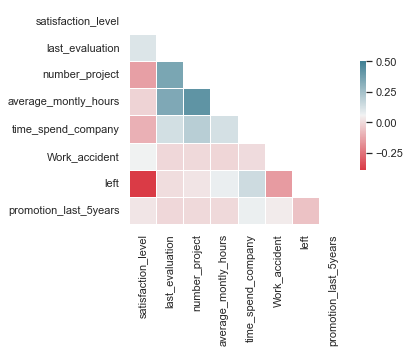

In [46]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

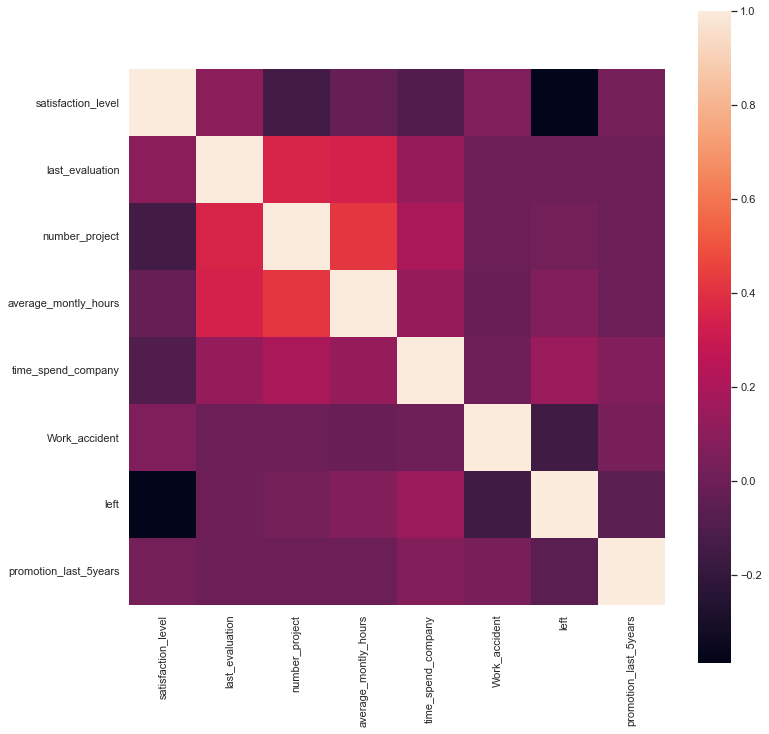

In [48]:
# Creating the heatmap of correlation matrix
corr = df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True)
plt.show()

In [57]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


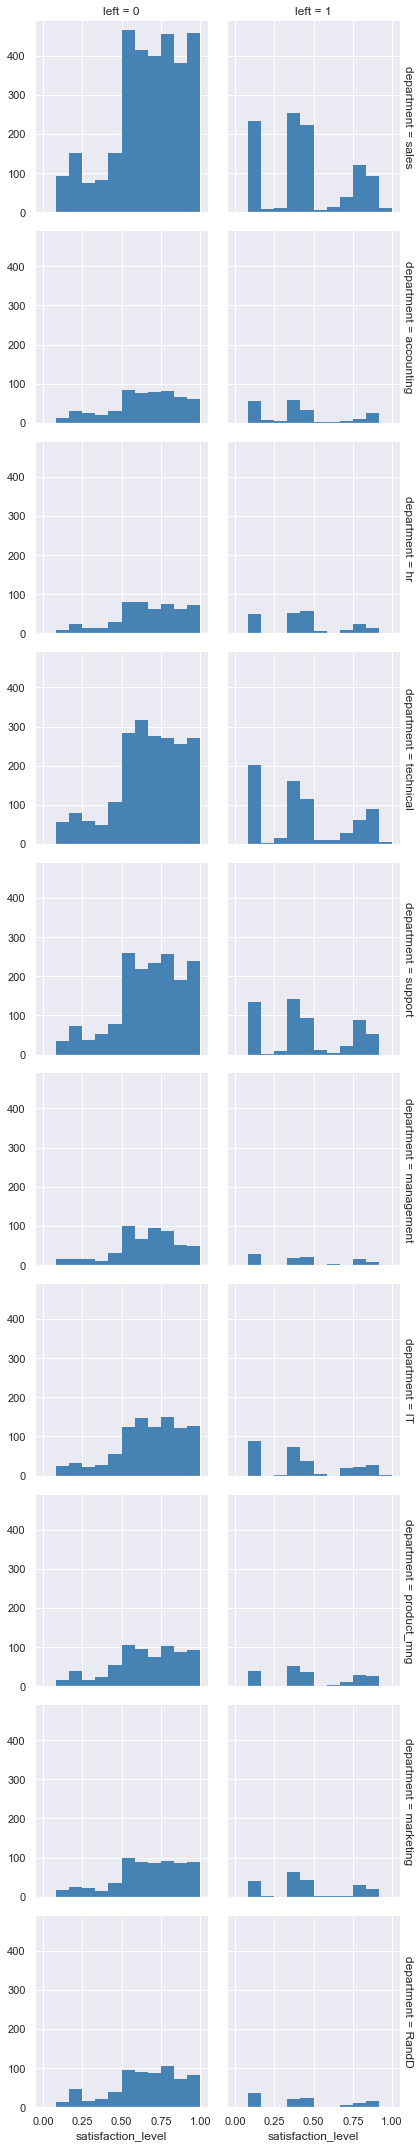

In [58]:
sns.set(style="darkgrid")
g = sns.FacetGrid(df, row="department", col="left", margin_titles=True)
bins = np.linspace(0, 1, 13)
g.map(plt.hist, "satisfaction_level", color="steelblue", bins=bins, lw=0)

In [67]:
df = pd.DataFrame(df)
df2 = pd.get_dummies(df['salary'], prefix="salary", prefix_sep="_", drop_first=True)
#df2=pd.get_dummies(df,columns=['salary'])
# df2.dtypes
# df2.head()
df3 = pd.concat([df,df2], axis=1)
df3.drop('salary', axis=1, inplace=True)
df3.drop('department', axis=1, inplace=True)
df3.head(1000)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
995,0.38,0.46,2,144,3,0,1,0,1,0
996,0.38,0.54,2,157,3,0,1,0,0,1
997,0.86,0.94,5,224,5,0,1,0,0,1
998,0.37,0.46,2,155,3,0,1,0,0,1


In [70]:
X = df3.loc[:, df3.columns != 'left']
Y = df3.loc[:, df3.columns == 'left']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_low,salary_medium
14404,0.09,0.82,6,249,4,0,0,0,1
2157,0.67,0.54,2,141,2,0,0,1,0
4249,0.95,0.81,3,260,2,0,0,1,0
13811,0.95,0.75,4,151,3,0,0,0,1
5625,0.64,0.57,3,179,3,0,0,0,1


In [72]:
clf = RandomForestClassifier()

In [73]:
clf.fit(X_train, Y_train)

C:\Users\SANJE_~1\AppData\Local\Temp/ipykernel_17196/3383944391.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


RandomForestClassifier()

In [74]:
pred = clf.predict(X_test)

In [75]:
acc = accuracy_score(Y_test, pred)

In [76]:
print("Accuracy of the algorithm: ", acc)
print("Total number of employees which are likely to leave: ", sum(pred))

Accuracy of the algorithm:  0.9924444444444445
Total number of employees which are likely to leave:  1067


In [77]:
df4 = df3[df3['left']==0]
df4.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_low,salary_medium
2000,0.58,0.74,4,215,3,0,0,0,1,0
2001,0.82,0.67,2,202,3,0,0,0,1,0
2002,0.45,0.69,5,193,3,0,0,0,1,0
2003,0.78,0.82,5,247,3,0,0,0,1,0
2004,0.49,0.60,3,214,2,0,0,0,1,0
